In [1]:
#https://10.10.142.43:8000/user/dev/notebooks/ejemplo_GonzaloMoreno.ipynb
# user= dev, password 123
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #para gráficar


In [2]:

a=tf.add(3,5)

with tf.Session()as sess:
    print(sess.run(a))

8


In [6]:

pasajeros= pd.read_csv('international-airline-passengers.csv', sep=';', skipfooter=3,engine='python', usecols=[1])
# skiffoter se salta los ultimos 3
# usecols= scogemos solo una columna
pasajeros.head()

Passengers
0         112
1         118
2         132
3         129
4         121

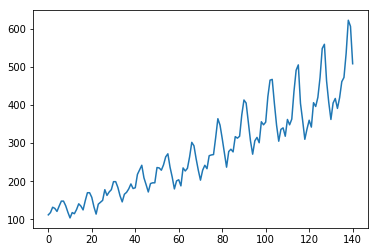

In [7]:
plt.plot(pasajeros)
plt.show()

#vamos a normalizar para que converja el apredizaje más rápido
#seleccionar los inputs
#split data en training y testing
# input 5 ultimos data ->10 LSTM-> 10 LSTM -> 1 Dense -> siguiente observación.


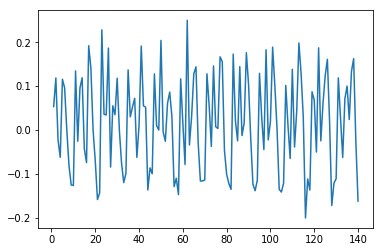

In [9]:
# Normalizamos los datos
from sklearn.preprocessing import MinMaxScaler
import sys

scaler= MinMaxScaler(feature_range=(0,1)) #Rango de 0 a 1
df= scaler.fit_transform(pasajeros)

#plt.plot(df[1:]/df[:-1])
plt.plot(pasajeros.pct_change())
plt.show()

In [10]:
# vamosa extraer las ultimas 5 posiciones

def createdataset(timeseries, lookback):
    X,Y=[],[]
    for i in range(len(timeseries)-lookback-1):
        X.append(timeseries[i:(i+lookback),0])
        Y.append(timeseries[(i+lookback),0])
    X=np.array(X)
    Y=np.array(Y)
    return np.reshape(X,(X.shape[0],X.shape[1],1)), Y
        

In [11]:
lookback=5
X,Y=createdataset(df,5)

In [12]:
# Particion en training, dev y testing

print(X.shape)
print(Y.shape)

size=int(Y.shape[0]*2/3)
trainX,trainY=X[0:size], Y[0:size]
testX, testY=X[size:], Y[size:]

(135, 5, 1)
(135,)


In [15]:
#Por fin keras para lstm
# input 5 ultimos data ->10 LSTM-> 10 LSTM -> 1 Dense -> siguiente observación.
#Keras facilita la creación de modelo
from keras.models import Sequential
from keras.layers import Dense, LSTM

model=Sequential()
model.add(LSTM(10,input_shape=(lookback,1),return_sequences=True))
model.add(LSTM(10))
model.add(Dense(1))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 10)             480       
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=1000, batch_size=16, verbose=2)

Epoch 1/1000
1s - loss: 0.0742
Epoch 2/1000
0s - loss: 0.0640
Epoch 3/1000
0s - loss: 0.0538
Epoch 4/1000
0s - loss: 0.0453
Epoch 5/1000
0s - loss: 0.0375
Epoch 6/1000
0s - loss: 0.0303
Epoch 7/1000
0s - loss: 0.0246
Epoch 8/1000
0s - loss: 0.0194
Epoch 9/1000
0s - loss: 0.0163
Epoch 10/1000
0s - loss: 0.0148
Epoch 11/1000
0s - loss: 0.0143
Epoch 12/1000
0s - loss: 0.0143
Epoch 13/1000
0s - loss: 0.0139
Epoch 14/1000
0s - loss: 0.0135
Epoch 15/1000
0s - loss: 0.0129
Epoch 16/1000
0s - loss: 0.0125
Epoch 17/1000
0s - loss: 0.0121
Epoch 18/1000
0s - loss: 0.0116
Epoch 19/1000
0s - loss: 0.0112
Epoch 20/1000
0s - loss: 0.0107
Epoch 21/1000
0s - loss: 0.0103
Epoch 22/1000
0s - loss: 0.0098
Epoch 23/1000
0s - loss: 0.0094
Epoch 24/1000
0s - loss: 0.0090
Epoch 25/1000
0s - loss: 0.0086
Epoch 26/1000
0s - loss: 0.0081
Epoch 27/1000
0s - loss: 0.0078
Epoch 28/1000
0s - loss: 0.0074
Epoch 29/1000
0s - loss: 0.0073
Epoch 30/1000
0s - loss: 0.0070
Epoch 31/1000
0s - loss: 0.0067
Epoch 32/1000
0s 

0s - loss: 0.0026
Epoch 254/1000
0s - loss: 0.0027
Epoch 255/1000
0s - loss: 0.0026
Epoch 256/1000
0s - loss: 0.0026
Epoch 257/1000
0s - loss: 0.0026
Epoch 258/1000
0s - loss: 0.0026
Epoch 259/1000
0s - loss: 0.0026
Epoch 260/1000
0s - loss: 0.0025
Epoch 261/1000
0s - loss: 0.0026
Epoch 262/1000
0s - loss: 0.0025
Epoch 263/1000
0s - loss: 0.0026
Epoch 264/1000
0s - loss: 0.0025
Epoch 265/1000
0s - loss: 0.0026
Epoch 266/1000
0s - loss: 0.0025
Epoch 267/1000
0s - loss: 0.0025
Epoch 268/1000
0s - loss: 0.0024
Epoch 269/1000
0s - loss: 0.0024
Epoch 270/1000
0s - loss: 0.0024
Epoch 271/1000
0s - loss: 0.0025
Epoch 272/1000
0s - loss: 0.0025
Epoch 273/1000
0s - loss: 0.0023
Epoch 274/1000
0s - loss: 0.0024
Epoch 275/1000
0s - loss: 0.0024
Epoch 276/1000
0s - loss: 0.0024
Epoch 277/1000
0s - loss: 0.0024
Epoch 278/1000
0s - loss: 0.0023
Epoch 279/1000
0s - loss: 0.0023
Epoch 280/1000
0s - loss: 0.0023
Epoch 281/1000
0s - loss: 0.0023
Epoch 282/1000
0s - loss: 0.0023
Epoch 283/1000
0s - loss:

0s - loss: 0.0016
Epoch 503/1000
0s - loss: 0.0015
Epoch 504/1000
0s - loss: 0.0016
Epoch 505/1000
0s - loss: 0.0015
Epoch 506/1000
0s - loss: 0.0017
Epoch 507/1000
0s - loss: 0.0017
Epoch 508/1000
0s - loss: 0.0015
Epoch 509/1000
0s - loss: 0.0016
Epoch 510/1000
0s - loss: 0.0015
Epoch 511/1000
0s - loss: 0.0016
Epoch 512/1000
0s - loss: 0.0017
Epoch 513/1000
0s - loss: 0.0015
Epoch 514/1000
0s - loss: 0.0016
Epoch 515/1000
0s - loss: 0.0015
Epoch 516/1000
0s - loss: 0.0016
Epoch 517/1000
0s - loss: 0.0015
Epoch 518/1000
0s - loss: 0.0016
Epoch 519/1000
0s - loss: 0.0015
Epoch 520/1000
0s - loss: 0.0015
Epoch 521/1000
0s - loss: 0.0015
Epoch 522/1000
0s - loss: 0.0016
Epoch 523/1000
0s - loss: 0.0015
Epoch 524/1000
0s - loss: 0.0015
Epoch 525/1000
0s - loss: 0.0015
Epoch 526/1000
0s - loss: 0.0016
Epoch 527/1000
0s - loss: 0.0016
Epoch 528/1000
0s - loss: 0.0015
Epoch 529/1000
0s - loss: 0.0016
Epoch 530/1000
0s - loss: 0.0015
Epoch 531/1000
0s - loss: 0.0015
Epoch 532/1000
0s - loss:

0s - loss: 0.0015
Epoch 756/1000
0s - loss: 0.0015
Epoch 757/1000
0s - loss: 0.0015
Epoch 758/1000
0s - loss: 0.0016
Epoch 759/1000
0s - loss: 0.0016
Epoch 760/1000
0s - loss: 0.0015
Epoch 761/1000
0s - loss: 0.0017
Epoch 762/1000
0s - loss: 0.0017
Epoch 763/1000
0s - loss: 0.0016
Epoch 764/1000
0s - loss: 0.0016
Epoch 765/1000
0s - loss: 0.0015
Epoch 766/1000
0s - loss: 0.0015
Epoch 767/1000
0s - loss: 0.0016
Epoch 768/1000
0s - loss: 0.0015
Epoch 769/1000
0s - loss: 0.0016
Epoch 770/1000
0s - loss: 0.0015
Epoch 771/1000
0s - loss: 0.0015
Epoch 772/1000
0s - loss: 0.0015
Epoch 773/1000
0s - loss: 0.0015
Epoch 774/1000
0s - loss: 0.0015
Epoch 775/1000
0s - loss: 0.0015
Epoch 776/1000
0s - loss: 0.0015
Epoch 777/1000
0s - loss: 0.0015
Epoch 778/1000
0s - loss: 0.0015
Epoch 779/1000
0s - loss: 0.0015
Epoch 780/1000
0s - loss: 0.0015
Epoch 781/1000
0s - loss: 0.0015
Epoch 782/1000
0s - loss: 0.0015
Epoch 783/1000
0s - loss: 0.0015
Epoch 784/1000
0s - loss: 0.0015
Epoch 785/1000
0s - loss:

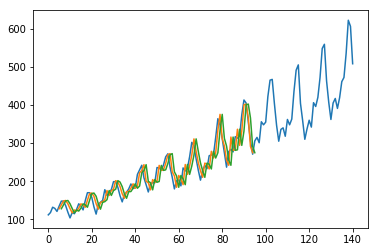

In [18]:
model.reset_states()
trainP=model.predict(trainX)
testP=model.predict(testX)

plt.plot(scaler.inverse_transform(df))
plt.plot(np.append(np.repeat(None,lookback),scaler.inverse_transform(trainP)))
plt.plot(np.append(np.repeat(None,lookback + trainP.shape[1]),scaler.inverse_transform(trainP)))
plt.show()